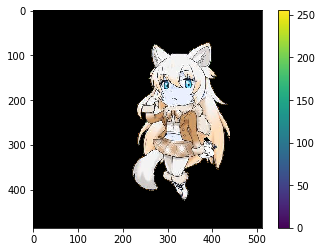

(<matplotlib.image.AxesImage at 0x2546141ceb8>,
 None)

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

fname = '20151225174718cRVL4Dkz.jpg'
img = cv2.imread(fname)

mask_rect = (280, 120, 80, 80) # 顔領域
x1, y1 = mask_rect[0], mask_rect[1]
x2, y2 = x1 + mask_rect[2], y1 + mask_rect[3]

rect = (210, 50, 230, 400)
def img_clip(img):
    h, w, c = img.shape
    x0 = int(w * 0.45)
    y0 = int(h * 0.76)
    clip = img[0:y0, 0:x0, :]
    return clip

cimg = img_clip(img)
mask = np.zeros(cimg.shape[:2], np.uint8)
bgModel = np.zeros((1, 65), np.float64)
fgModel = np.zeros((1, 65), np.float64)

cv2.grabCut(cimg, mask, rect, bgModel, fgModel, 5, cv2.GC_INIT_WITH_RECT) # この時点でmaskに0~2の値(背景、前景、曖昧)が指定される
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype(np.uint8) # 前景以外の値はゼロクリア

cv2.rectangle(mask2, (x1, y1), (x2, y2), 1, -1) # 顔領域を1で塗りつぶす
cv2.grabCut(cimg, mask2, None, bgModel, fgModel, 5, cv2.GC_INIT_WITH_MASK) # マスク情報に基づいたGrabCutを適用
mask = np.where((mask2 == 2) | (mask2 == 0), 0, 1).astype(np.uint8)

out = cimg * mask[:, :, np.newaxis]

plt.imshow(out),plt.colorbar(),plt.show()